In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
import shap


df=pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
print(df.head())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [6]:
print(df.describe())

               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75% 

In [7]:
print(df.isnull().sum())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [8]:
print(df.duplicated().sum())

24


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
print(df.duplicated().sum())

0


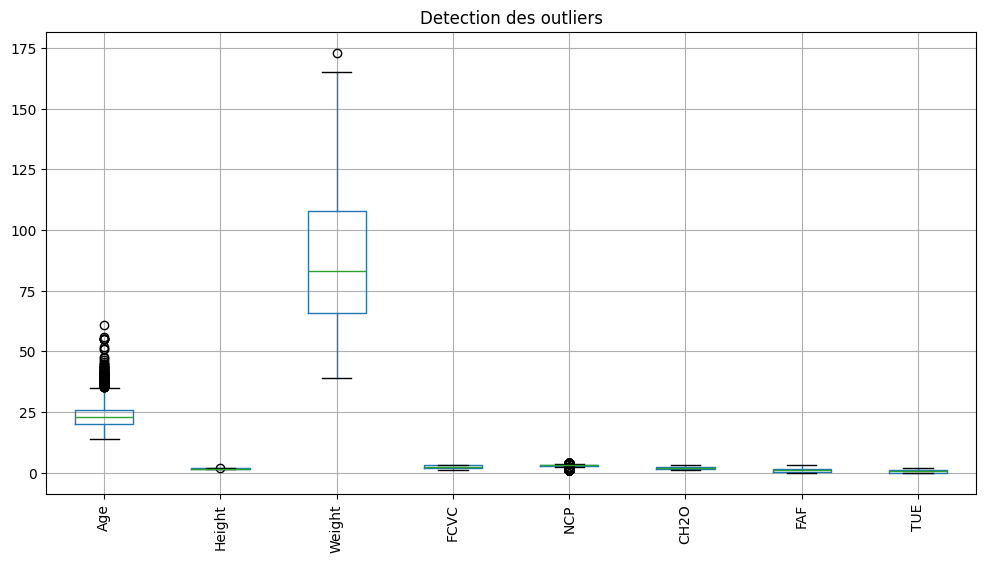

In [11]:
import matplotlib.pyplot as plt
df.head()
plt.figure(figsize=(12,6))
df.boxplot(rot=90)
plt.title("Detection des outliers")
plt.show()

In [12]:
from scipy.stats import zscore 
z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).sum(axis=0)
print("Nombre d'outliers detectes par case :")
print(outliers)

Nombre d'outliers detectes par case :
[23  0  1  0  0  0  0  0]


In [13]:
duplicates = df[df.duplicated(keep=False)]

In [14]:
print(df.duplicated().sum()) 

0


In [15]:
duplicates = df[df.duplicated(keep=False)]

print("Lignes dupliquées :")
print(duplicates)

Lignes dupliquées :
Empty DataFrame
Columns: [Gender, Age, Height, Weight, family_history_with_overweight, FAVC, FCVC, NCP, CAEC, SMOKE, CH2O, SCC, FAF, TUE, CALC, MTRANS, NObeyesdad]
Index: []


In [16]:
for col in df.columns:
    duplicate_col = df.duplicated(subset=[col], keep=False)
    if duplicate_col.any():
        print(f"Doublons détectés dans la colonne: {col}")
        print(df.loc[duplicate_col, [col]])


Doublons détectés dans la colonne: Gender
      Gender
0     Female
1     Female
2       Male
3       Male
4       Male
...      ...
2106  Female
2107  Female
2108  Female
2109  Female
2110  Female

[2087 rows x 1 columns]
Doublons détectés dans la colonne: Age
       Age
0     21.0
1     21.0
2     23.0
3     27.0
4     22.0
...    ...
2090  26.0
2091  26.0
2092  26.0
2093  26.0
2094  26.0

[720 rows x 1 columns]
Doublons détectés dans la colonne: Height
        Height
0     1.620000
1     1.520000
2     1.800000
3     1.800000
4     1.780000
...        ...
1629  1.697421
1637  1.750150
1683  1.755938
1779  1.603501
2068  1.697421

[564 rows x 1 columns]
Doublons détectés dans la colonne: Weight
          Weight
0      64.000000
1      56.000000
2      77.000000
3      87.000000
5      53.000000
...          ...
1523  120.860386
1525  120.000000
1543  116.160329
1545  120.860386
1613  120.000000

[620 rows x 1 columns]
Doublons détectés dans la colonne: family_history_with_overweight


In [17]:

df_numeric = df.select_dtypes(include=['number'])


Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1


outliers_iqr = ((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).sum()

print("Outliers détectés par la méthode IQR :")
print(outliers_iqr)


Outliers détectés par la méthode IQR :
Age       167
Height      1
Weight      1
FCVC        0
NCP       577
CH2O        0
FAF         0
TUE         0
dtype: int64


In [18]:
df = df.drop_duplicates()
print(df.shape)  

(2087, 17)


Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')


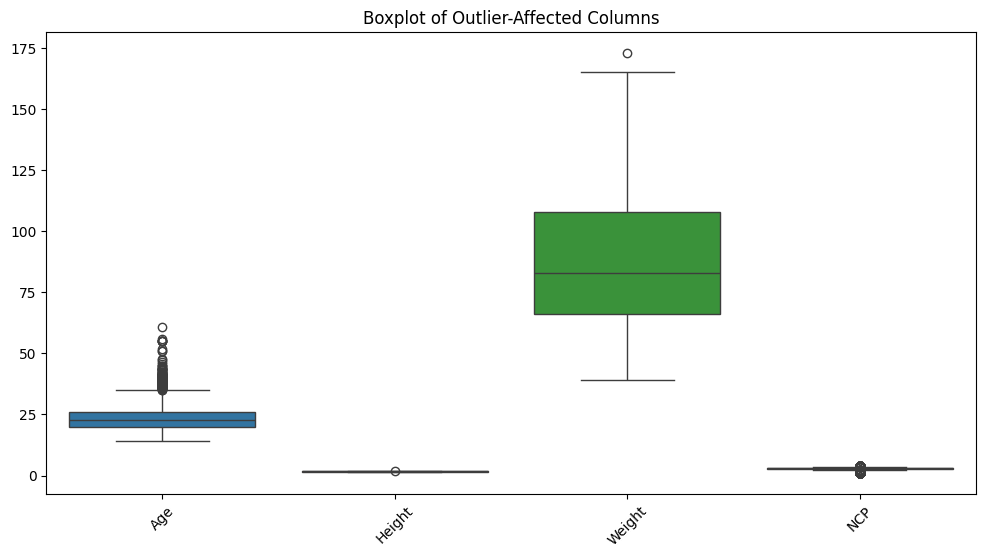

In [19]:

df_numeric = df.select_dtypes(include=['number'])

print(df_numeric.columns)


plt.figure(figsize=(12, 6))


sns.boxplot(data=df_numeric[['Age', 'Height', 'Weight', 'NCP']])

plt.xticks(rotation=45)
plt.title("Boxplot of Outlier-Affected Columns")
plt.show()


In [20]:
Q1_NCP = df['NCP'].quantile(0.25)
Q3_NCP = df['NCP'].quantile(0.75)
IQR_NCP = Q3_NCP - Q1_NCP


lower_bound = max(Q1_NCP - 1.5 * IQR_NCP, 1) 
upper_bound = min(Q3_NCP + 1.5 * IQR_NCP, 5) 


df_capped = df.copy()
df_capped['NCP'] = df['NCP'].clip(lower=lower_bound, upper=upper_bound)


In [21]:
df_filtered = df[(df['NCP'] >= 1) & (df['NCP'] <= 5)]


C:\Users\louki\AppData\Local\Temp\ipykernel_19992\3034781508.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")


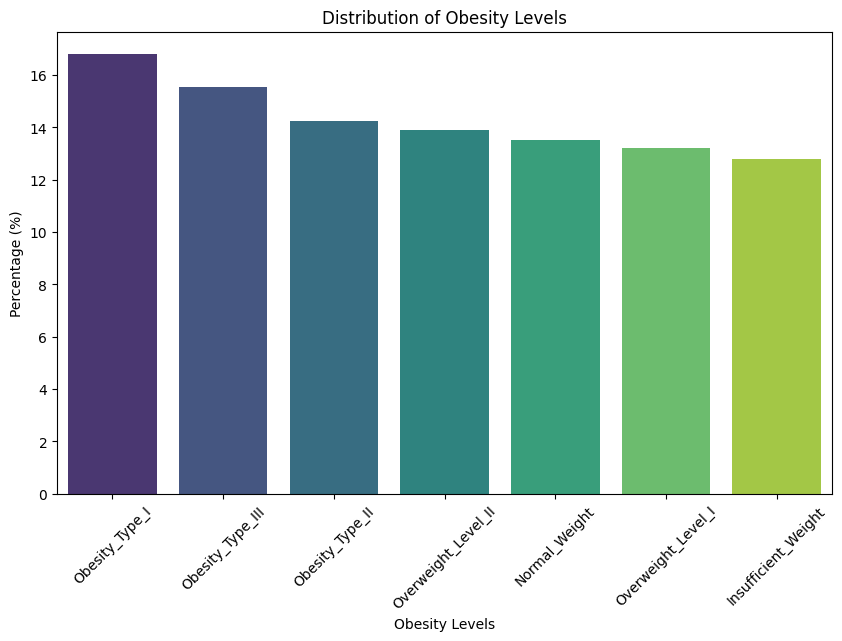

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


class_distribution = df['NObeyesdad'].value_counts(normalize=True) * 100  # Convert to percentage

plt.figure(figsize=(10, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")


plt.xlabel("Obesity Levels")
plt.ylabel("Percentage (%)")
plt.title("Distribution of Obesity Levels")
plt.xticks(rotation=45) 

plt.show()



C:\Users\louki\AppData\Local\Temp\ipykernel_19992\2286737078.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")


Class Distribution:
 NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          282
Overweight_Level_I     276
Insufficient_Weight    267
Name: count, dtype: int64


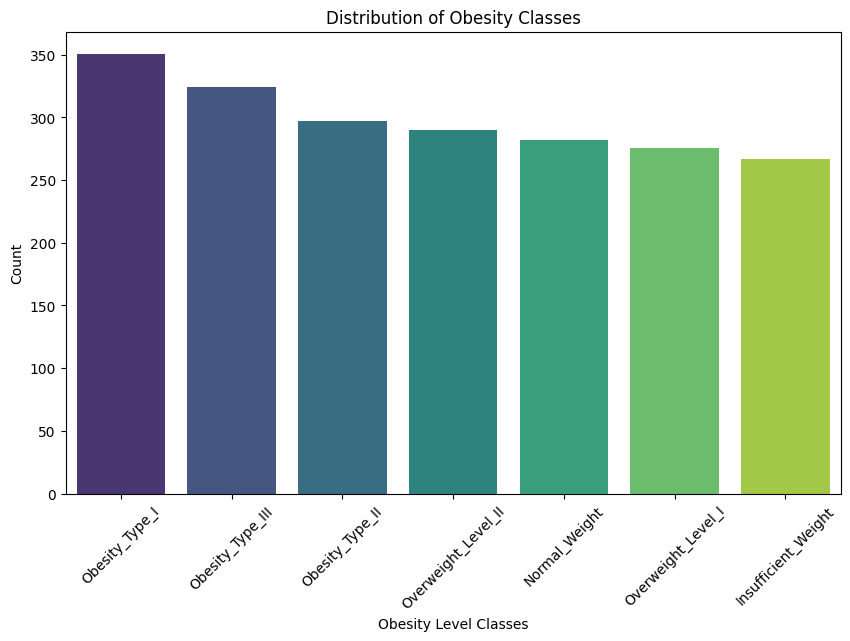

In [23]:
target_col = 'NObeyesdad'  

class_distribution = df[target_col].value_counts()

print("Class Distribution:\n", class_distribution)
plt.figure(figsize=(10, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")
plt.xlabel("Obesity Level Classes")
plt.ylabel("Count")
plt.title("Distribution of Obesity Classes")
plt.xticks(rotation=45)  
plt.show()

In [24]:

class_distribution = df['NObeyesdad'].value_counts(normalize=True) * 100
print(class_distribution)


NObeyesdad
Obesity_Type_I         16.818400
Obesity_Type_III       15.524677
Obesity_Type_II        14.230954
Overweight_Level_II    13.895544
Normal_Weight          13.512218
Overweight_Level_I     13.224724
Insufficient_Weight    12.793483
Name: proportion, dtype: float64


New class distribution: Counter({'Normal_Weight': 351, 'Overweight_Level_I': 351, 'Overweight_Level_II': 351, 'Obesity_Type_I': 351, 'Insufficient_Weight': 351, 'Obesity_Type_II': 351, 'Obesity_Type_III': 351})


C:\Users\louki\AppData\Local\Temp\ipykernel_19992\4078948089.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pd.Series(y_resampled).value_counts().index,


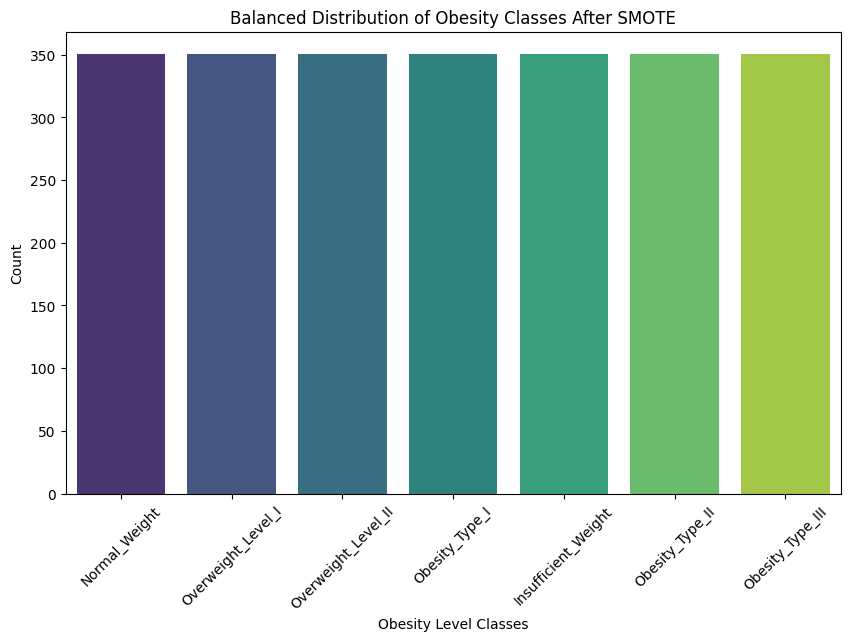

In [25]:
from imblearn.over_sampling import SMOTE
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('NObeyesdad') 

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le 

target_col = "NObeyesdad"
X = df.drop(columns=[target_col])
y = df[target_col]

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

from collections import Counter
print("New class distribution:", Counter(y_resampled))

plt.figure(figsize=(10, 6))
sns.barplot(x=pd.Series(y_resampled).value_counts().index,
            y=pd.Series(y_resampled).value_counts().values,
            palette="viridis")
plt.xlabel("Obesity Level Classes")
plt.ylabel("Count")
plt.title("Balanced Distribution of Obesity Classes After SMOTE")
plt.xticks(rotation=45)
plt.show()

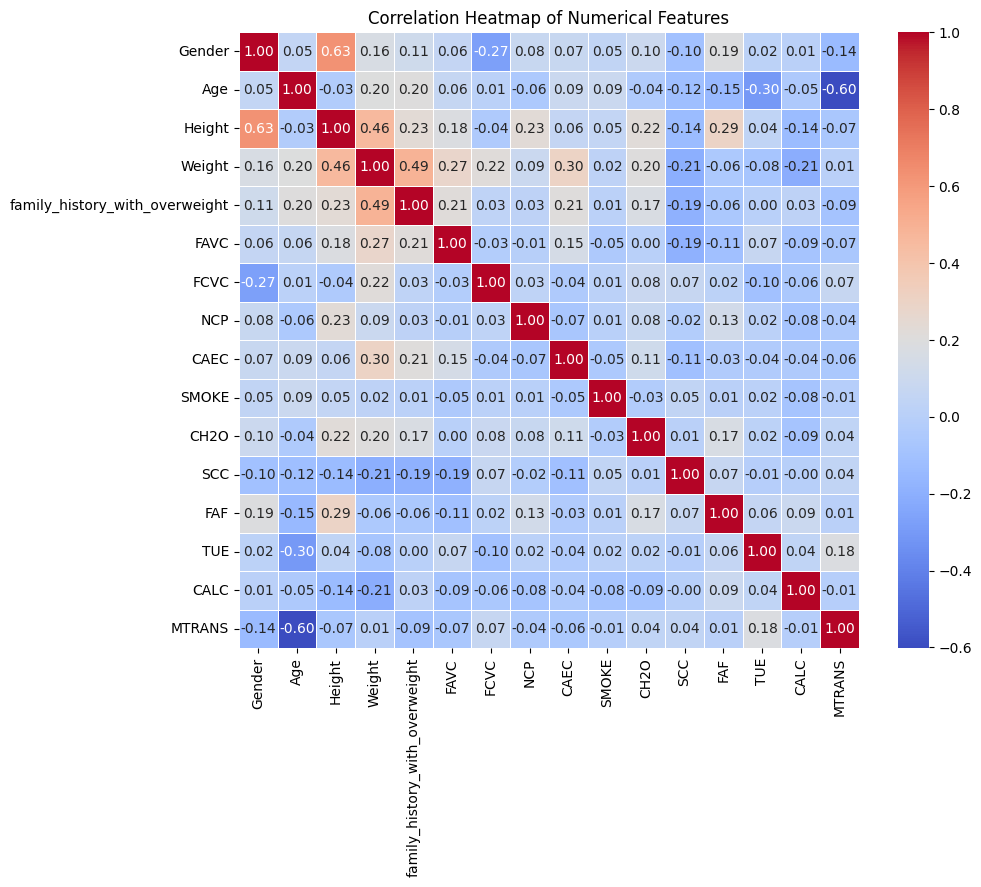

In [26]:

df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [27]:
correlation_threshold = 0.8
strong_correlations = {}
for col in correlation_matrix.columns:
    strong_corrs = correlation_matrix[col][(correlation_matrix[col] > correlation_threshold) & (correlation_matrix[col] < 1)].index.tolist()
    if strong_corrs:
        strong_correlations[col] = strong_corrs
strong_correlations

{}

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

import pandas as pd

df.head()

X = df.drop(columns=['NObeyesdad']).copy()  
y = df['NObeyesdad']
categorical_cols = X.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X.loc[:, col] = le.fit_transform(X[col]) 
    label_encoders[col] = le  
scaler = StandardScaler()
X.loc[:, X.select_dtypes(include=['number']).columns] = scaler.fit_transform(X.select_dtypes(include=['number']))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

C:\Users\louki\AppData\Local\Temp\ipykernel_19992\2107612426.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.00817911 -1.00817911  0.99188724 ... -1.00817911 -1.00817911
 -1.00817911]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[:, X.select_dtypes(include=['number']).columns] = scaler.fit_transform(X.select_dtypes(include=['number']))
C:\Users\louki\AppData\Local\Temp\ipykernel_19992\2107612426.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.46039422 0.46039422 0.46039422 ... 0.46039422 0.46039422 0.46039422]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[:, X.select_dtypes(include=['number']).columns] = scaler.fit_transform(X.select_dtypes(include=['number']))
C:\Users\louki\AppData\Local\Temp\ipykernel_19992\2107612426.py:18: F

((1669, 16), (418, 16), (1669,), (418,))

Model: Random Forest
              precision    recall  f1-score   support

           0       0.93      0.86      0.89        59
           1       0.64      0.67      0.66        61
           2       0.75      0.91      0.83        70
           3       0.95      0.95      0.95        64
           4       1.00      1.00      1.00        60
           5       0.86      0.69      0.77        55
           6       0.80      0.76      0.78        49

    accuracy                           0.84       418
   macro avg       0.85      0.84      0.84       418
weighted avg       0.85      0.84      0.84       418

--------------------------------------------------
Model: XGBoost
              precision    recall  f1-score   support

           0       0.96      0.83      0.89        59
           1       0.64      0.62      0.63        61
           2       0.77      0.93      0.84        70
           3       0.98      0.95      0.97        64
           4       0.98      1.00      0.99  

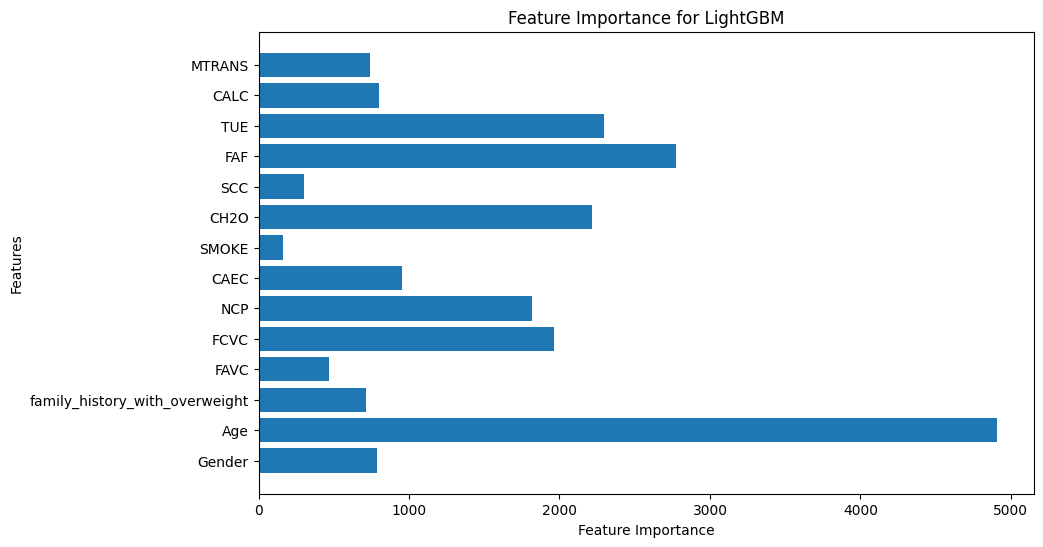

In [31]:

import pandas as pd
import numpy as np

import shap
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report
df.head()

categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


le_target = LabelEncoder()
df['NObeyesdad'] = le_target.fit_transform(df['NObeyesdad'])
X = df.drop(columns=['NObeyesdad', 'Height', 'Weight']) 
y = df['NObeyesdad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
numerical_features = ['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])
models = {
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier()}

model_performance = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_performance[name] = accuracy
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)
best_model_name = max(model_performance, key=model_performance.get)
best_model = models[best_model_name]

print(f"Best Model: {best_model_name} with Accuracy: {model_performance[best_model_name]:.4f}")
if best_model_name == "Random Forest":
    feature_importance = best_model.feature_importances_
elif best_model_name == "XGBoost":
    feature_importance = best_model.feature_importances_
elif best_model_name == "LightGBM":
    feature_importance = best_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title(f'Feature Importance for {best_model_name}')
plt.show()

In [32]:
def optimize_memory(df):
    for col in df.columns:
        col_type = df[col].dtype
        if pd.api.types.is_integer_dtype(col_type):
            df[col] = pd.to_numeric(df[col], downcast='integer')
        elif pd.api.types.is_float_dtype(col_type):
            df[col] = pd.to_numeric(df[col], downcast='float')
        elif pd.api.types.is_object_dtype(col_type):
            df[col] = df[col].astype('category')
    
    return df

def demonstrate_memory_optimization(df):
    before_memory = df.memory_usage(deep=True)
    print("Memory usage before optimization:")
    print(before_memory)
    df_optimized = optimize_memory(df)
    after_memory = df_optimized.memory_usage(deep=True)
    print("\nMemory usage after optimization:")
    print(after_memory)
    return before_memory, after_memory
before_memory, after_memory = demonstrate_memory_optimization(df)

before_memory, after_memory

Memory usage before optimization:
Index                             16696
Gender                            16696
Age                               16696
Height                            16696
Weight                            16696
family_history_with_overweight    16696
FAVC                              16696
FCVC                              16696
NCP                               16696
CAEC                              16696
SMOKE                             16696
CH2O                              16696
SCC                               16696
FAF                               16696
TUE                               16696
CALC                              16696
MTRANS                            16696
NObeyesdad                        16696
dtype: int64

Memory usage after optimization:
Index                             16696
Gender                             2087
Age                                8348
Height                             8348
Weight                             8348

(Index                             16696
 Gender                            16696
 Age                               16696
 Height                            16696
 Weight                            16696
 family_history_with_overweight    16696
 FAVC                              16696
 FCVC                              16696
 NCP                               16696
 CAEC                              16696
 SMOKE                             16696
 CH2O                              16696
 SCC                               16696
 FAF                               16696
 TUE                               16696
 CALC                              16696
 MTRANS                            16696
 NObeyesdad                        16696
 dtype: int64,
 Index                             16696
 Gender                             2087
 Age                                8348
 Height                             8348
 Weight                             8348
 family_history_with_overweight     2087
 